<a href="https://colab.research.google.com/github/edwardhan925192/Python_grammar/blob/main/Team%20project%201/ANN%20model/happiness_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('/content/drive/MyDrive/data/행복도 데이터/seoulsurvey_newest.csv')

#행복도 3가지로 구분시키기

In [31]:
df['행복범위(사회)'] = df['행복지수(사회생활) '].apply(categorize)

In [30]:
def categorize (x):
  if x in range(0,4):
    return 0
  elif x in range(4,8):
    return 1
  else: 
    return 2 
  

In [32]:
model_parameters = df[['종교 ','직업','학력','직업만족도 ', '월평균 근로소득 ' ,'가족관 신뢰 ','교통 이용 만족도 지하철','신뢰 친구 ','혼인상태','행복범위(사회)']]

In [ ]:
model_parameters.drop(model_parameters[ model_parameters.isna().any(axis =1 )].index,axis = 0,inplace = True)

In [34]:
model_parameters.reset_index(drop = True, inplace = True)

#Test data, Train data 분류

In [23]:
from sklearn.model_selection import train_test_split

In [35]:
y = model_parameters['행복범위(사회)']
X = model_parameters.drop('행복범위(사회)',axis = 1)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [28]:
from keras.callbacks import Callback

class PrintAccuracyCallback(Callback):
    def on_epoch_end(self, epoch, logs={}):
        print("Accuracy: {:.2f}%".format(logs["accuracy"] * 100))



#Model training

In [37]:
model = keras.Sequential([
    keras.layers.Dense(30, input_shape=(9,), activation='relu'),
    keras.layers.Dense(3, activation='sigmoid')
    
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, callbacks=[PrintAccuracyCallback()])

Epoch 1/10


/usr/local/lib/python3.9/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


3098/3098 [==============================] - 6s 2ms/step - loss: 0.7498 - accuracy: 0.6314
Epoch 2/10
3098/3098 [==============================] - 7s 2ms/step - loss: 0.7316 - accuracy: 0.6354
Epoch 3/10
3098/3098 [==============================] - 5s 2ms/step - loss: 0.7272 - accuracy: 0.6379
Epoch 4/10
3098/3098 [==============================] - 6s 2ms/step - loss: 0.7245 - accuracy: 0.6401
Epoch 5/10
3098/3098 [==============================] - 6s 2ms/step - loss: 0.7225 - accuracy: 0.6414
Epoch 6/10
3098/3098 [==============================] - 5s 2ms/step - loss: 0.7216 - accuracy: 0.6409
Epoch 7/10
3098/3098 [==============================] - 7s 2ms/step - loss: 0.7206 - accuracy: 0.6412
Epoch 8/10
3098/3098 [==============================] - 5s 2ms/step - loss: 0.7200 - accuracy: 0.6428
Epoch 9/10
3098/3098 [==============================] - 6s 2ms/step - loss: 0.7193 - accuracy: 0.6430
Epoch 10/10
3098/3098 [==============================] - 6s 2ms/step - loss: 0.7189 - accurac

#결과 예측 

In [38]:
model.evaluate(X_test,y_test)

  67/1033 [>.............................] - ETA: 1s - loss: 0.7223 - accuracy: 0.6348

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1033/1033 [==============================] - 2s 1ms/step - loss: 0.7241 - accuracy: 0.6408


[0.7241066098213196, 0.640785813331604]

In [39]:
yp = model.predict(X_test)

1033/1033 [==============================] - 1s 1ms/step


In [44]:
y_pred =[]
for i in yp:
  y_pred.append(np.argmax(i))

Text(95.72222222222221, 0.5, 'Truth')

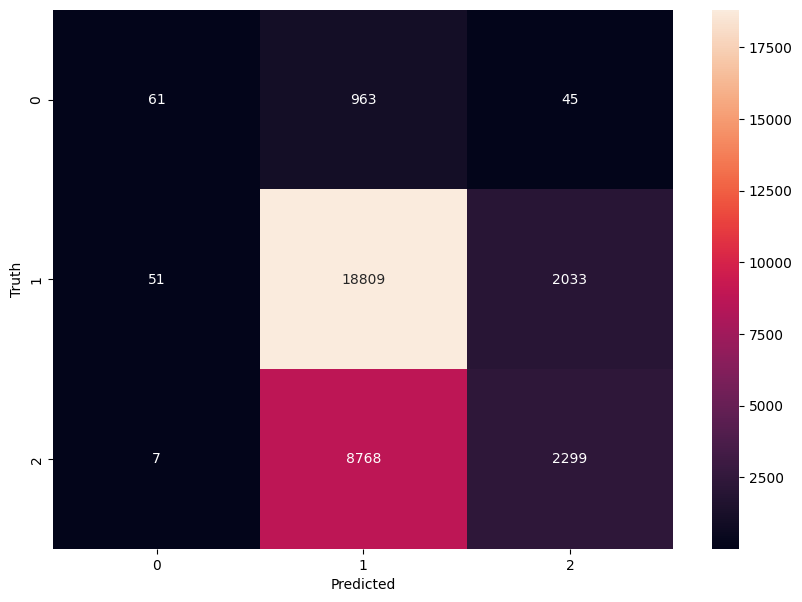

In [45]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')